<a href="https://colab.research.google.com/github/josuecaldas/predict_income/blob/main/PYTHON_predict_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### SET UP DATA

In [1]:
# Librerias de tratamiento
# ========================

import pandas as pd
import numpy as np

In [72]:
# Librerias de preprocesamiento y modelado
# ========================================

from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [33]:
data = pd.read_csv("predict_access1620.csv", encoding = "latin-1")

In [35]:
# Division de las variables predecidas y predictores
# ==================================================

predecido = ['educacion_sup']
predictores = list(set(list(data.columns)) - set(predecido))

In [36]:
# División de las variables en "x" y "y"
# ======================================

y = data[predecido]
x = data[predictores]

In [37]:
# Division en test set y training set (test set = 30%)
# ====================================================

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30,
                                                    shuffle = True, 
                                                    random_state = 22)
print(x_train.shape); print(x_test.shape)

(529, 111)
(228, 111)


#### REGRESION LASSO

In [38]:
# Seleccionamos el mejor alpha (lambda)
# =====================================

lasso_r = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=10)

In [39]:
# Entrenamos el modelo
# =====================================

lasso_r = lasso_r.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# Obtenemos los coeficientes LASSO
# =================================================

lasso_coeficientes = pd.DataFrame(
                      {'predictor': x.columns,
                      'coef':lasso_r.coef_.flatten()}
                  )
#lasso_coeficientes

#### EVALUACION DEL MODELO

In [76]:
# Obtener el AUC para el training set
# ===================================

roc_auc_score(y_train, lasso_r.decision_function(x_train))

0.7056731830876144

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


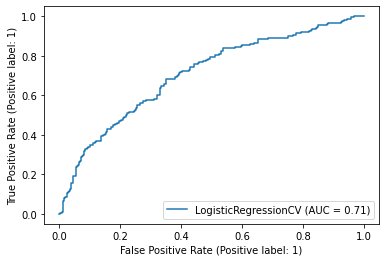

In [77]:
# Graficar EL AUC para el training set
# ====================================

metrics.plot_roc_curve(lasso_r, x_train, y_train) 

In [78]:
# Obtener el AUC para el test set
# ===============================

roc_auc_score(y_test, lasso_r.decision_function(x_test))

0.7153668091168092

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


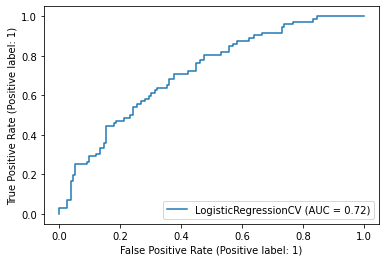

In [80]:
# Graficar EL AUC para el test set
# ================================

metrics.plot_roc_curve(lasso_r, x_test, y_test) 